<a href="https://colab.research.google.com/github/begumpoly/Golden-Globe-Awards/blob/main/goldenglobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Golden Globe Awards, 1944 - 2020**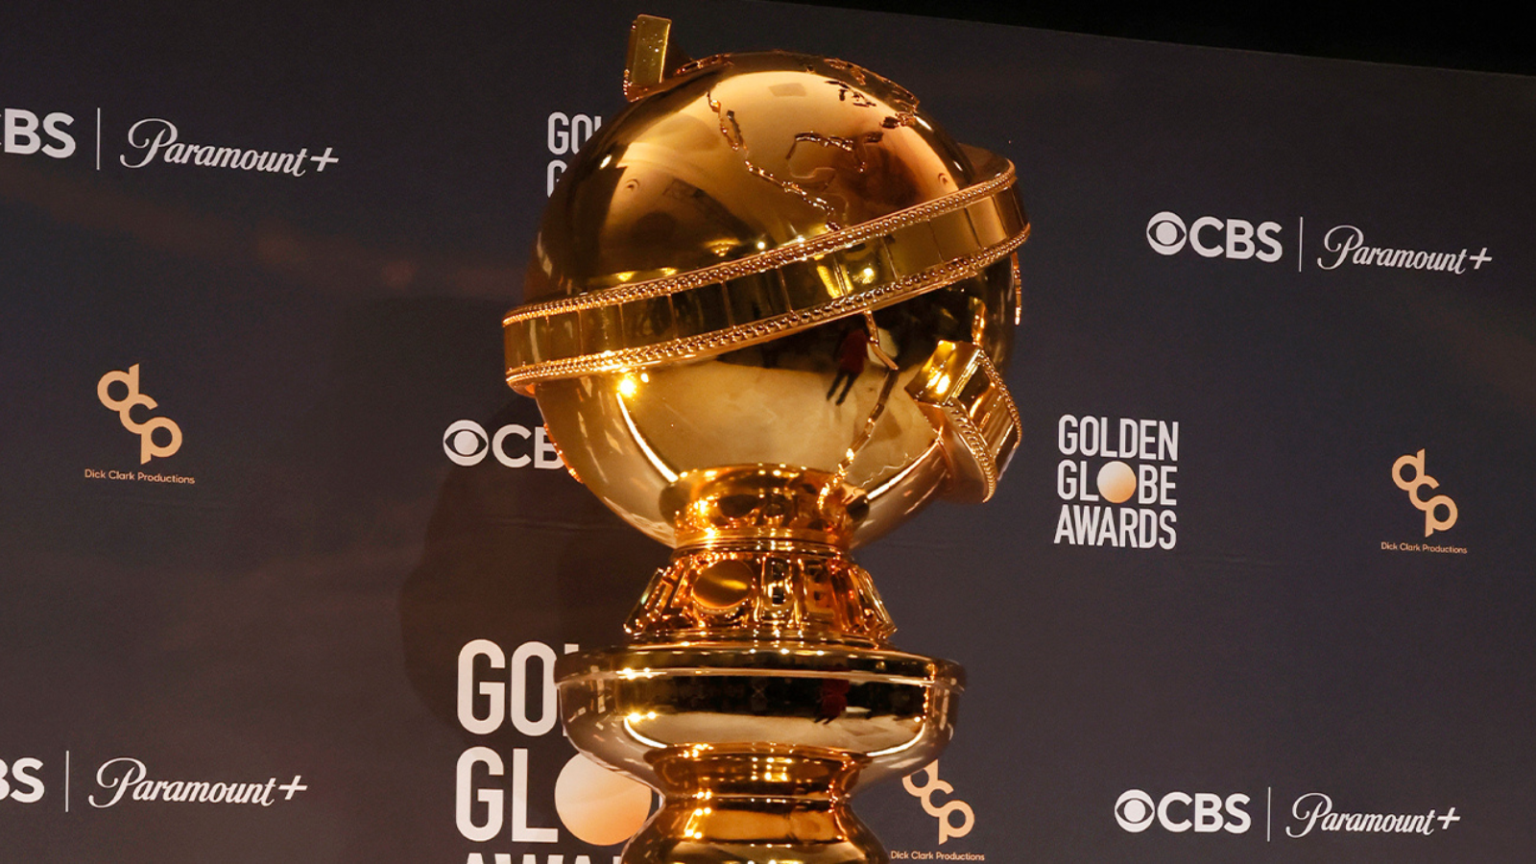



Kevin Winter/Getty Images (2025). The 82nd Annual Golden Globe Awards, Los Angeles, California. January 5, 2025.

<div style="text-align: right;">
Analyzed by Rabea Begum
</div>

This analysis applies Exploratory Data Analysis (EDA) in Python to examine historical trends in the Golden Globe Awards dataset. Before diving into insights, we perform data cleaning to handle missing values, format inconsistencies, and remove duplicates, ensuring accuracy. By leveraging powerful libraries like pandas, NumPy, Matplotlib, and Seaborn, we examine key variables such as year, category, nominee, film, and win status to uncover statistical patterns. Through visualization and data-driven insights, we aim to identify recurring winners, shifts in genre dominance, and potential systemic biases in award selections.



Data Collection & Exploration

In [ ]:
import pandas as pd # pandas library for data manipulation and analyzation.
import matplotlib.pyplot as plt # pyplot module from matplotlib for creating plots and visualizations.
import seaborn as sns # seaborn library, based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import plotly.figure_factory as ff # figure_factory module from the plotly library, create specific types of figures, commonly aliased as 'ff'.
from IPython.display import display, HTML # display and HTML functions from IPython.
import plotly.express as px # express module from the plotly library, a high-level API for quickly creating plotly figures, commonly aliased as 'px'.
import plotly.graph_objects as go # Import the graph_objects module from the plotly library, the lower-level API for creating detailed plotly figures, commonly aliased as 'go'.
import plotly.subplots as sp # Import the subplots module from the plotly library, used for creating figures with multiple plots arranged in a grid, commonly aliased as 'sp'.

In [ ]:
!pip install opendatasets
import opendatasets as od

In [55]:

dataset_url = 'https://www.kaggle.com/datasets/unanimad/golden-globe-awards'
od.download('https://www.kaggle.com/datasets/unanimad/golden-globe-awards')

Skipping, found downloaded files in "./golden-globe-awards" (use force=True to force download)


In [ ]:
# Define the path to the dataset file
file_path = './golden-globe-awards/golden_globe_awards.csv'
# Read the CSV file into a pandas DataFrame
award_df = pd.read_csv(file_path)

In [54]:
#Display the dimensions (rows, columns) of the DataFrame
print('number of rows:',award_df.shape[0])
print("number of columns:",award_df.shape[1])

number of rows: 7991
number of columns: 8


In [ ]:
award_df.columns # Display the names of the columns in the DataFrame

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')

In this data, there are 7991 rows and 8 columns

In [ ]:
award_df.head()# Display the first 5 rows of the DataFrame


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [ ]:
award_df.info()# concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


Data Cleaning & Preprocessing

In [ ]:
award_df.isnull().sum()# Count the number of missing values for each column

,0
year_film,0
year_award,0
ceremony,0
category,0
nominee,0
film,1800
win,0


In [ ]:
# Remove spaces from column names
award_df.columns = award_df.columns.str.replace(' ', '')

In [ ]:
#Removing Duplicates:

award_df.drop_duplicates(inplace=True)


In [ ]:
# Replace any missing values
award_df['film'] = award_df['film'].fillna('N/s')

In [60]:
# Print the 'film' column of the award_df DataFrame
print("film column:")
print(award_df['film'])

film column:
0       For Whom The Bell Tolls
1       For Whom The Bell Tolls
2        The Song Of Bernadette
3                           N/s
4        The Song Of Bernadette
                 ...           
7986                 Succession
7987                    Fleabag
7988                      Barry
7989                        N/s
7990                        N/s
Name: film, Length: 7991, dtype: object


In [ ]:
award_df.to_csv('golden_globe_awards_cleaned.csv', index=False)# cleaned data


In [ ]:
# Read the cleaned CSV file back into a new DataFrame
cleaned_df = pd.read_csv('golden_globe_awards_cleaned.csv')

Exploratory Data Analysis (EDA)

In [ ]:
print(award_df["category"].value_counts().head(10)) # Print the top 10 most frequent award categories and their counts

category
Best Performance by an Actress in a Supporting Role in any Motion Picture    360
Best Director - Motion Picture                                               357
Best Performance by an Actor in a Supporting Role in any Motion Picture      352
Best Motion Picture - Drama                                                  351
Best Performance by an Actor in a Motion Picture - Drama                     344
Best Performance by an Actor in a Motion Picture - Musical or Comedy         342
Best Performance by an Actress in a Motion Picture - Drama                   342
Best Original Score - Motion Picture                                         320
Best Motion Picture - Musical or Comedy                                      306
Best Screenplay - Motion Picture                                             293
Name: count, dtype: int64


<div style="text-align:center;">

## **Visualization**

</div>

<div style="text-align:center;">

## **Catagory**

</div>

In [ ]:
# Calculate the frequency of each unique value in the 'category' column
category_counts = award_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.treemap(category_counts, path=['category'], values='count',
                 title='Proportion of Award Categories')
fig.show()

<ipython-input-76-2580f0a2495a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




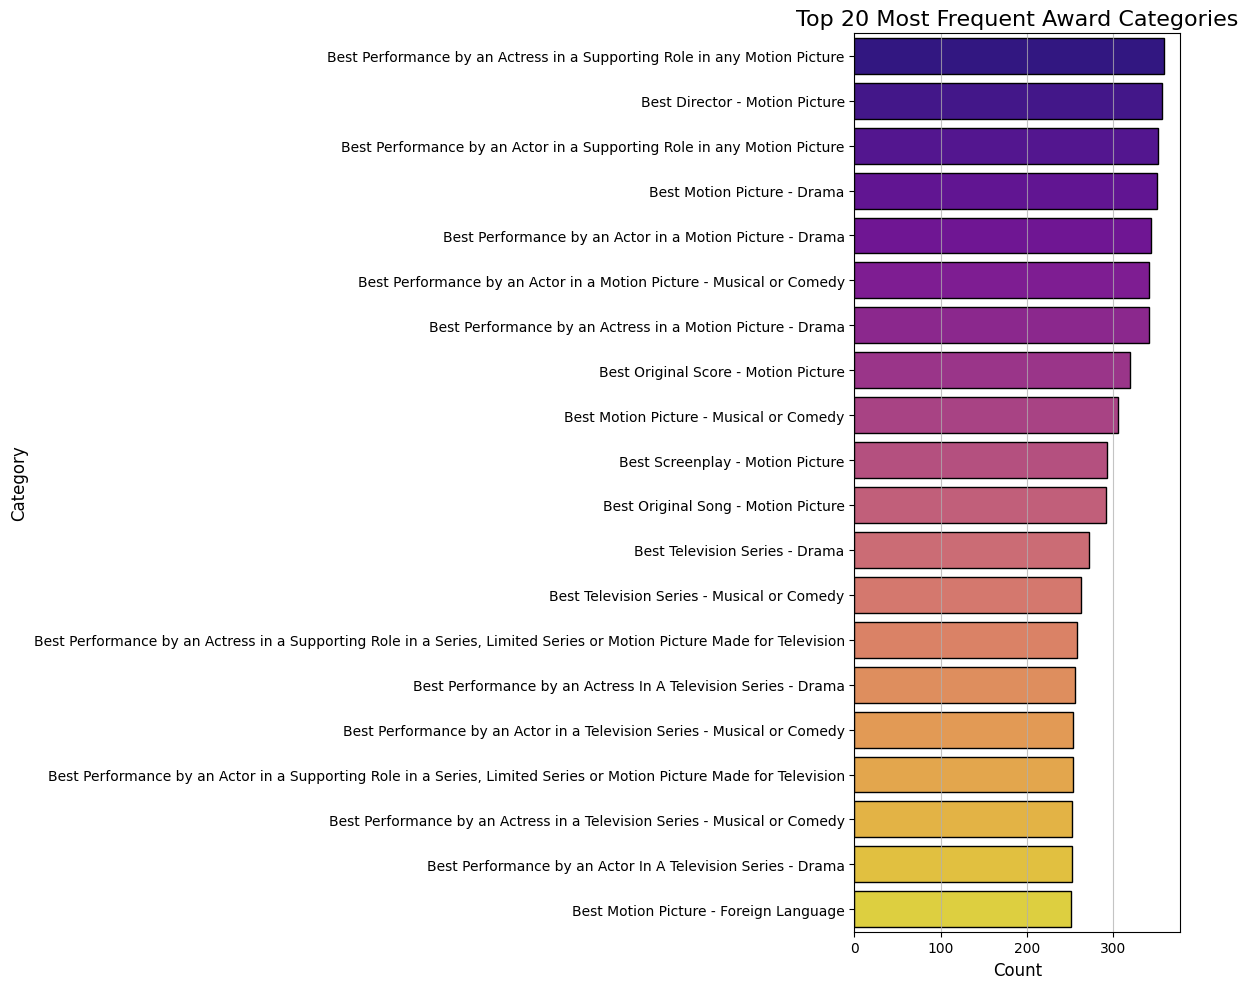

In [ ]:
## Get the top 20 categories by count
top_20_categories = df['category'].value_counts().nlargest(20).index

## Filter the DataFrame to include only the top 20 categories
df_top_20 = df[df['category'].isin(top_20_categories)]

## Create the count plot for the top 20 categories
plt.figure(figsize=(12, 10)) # Adjust figure size to accommodate 20 bars
sns.countplot(data=df_top_20, y='category', order=top_20_categories, palette='plasma', edgecolor='black')
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Set plot titles and labels
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Add a grid for better readability
plt.grid(axis='x', alpha=0.75)

## Adjust layout
plt.tight_layout()

## Display the plot
plt.show();

In [ ]:
# Separate awards for actors by checking if 'category' contains 'Actor'
actor_awards = award_df[award_df['category'].str.contains('Actor', na=False)]

# Separate awards for actresses by checking if 'category' contains 'Actress'
actress_awards = award_df[award_df['category'].str.contains('Actress', na=False)]

# Print the DataFrame containing actor awards
print("Actor Awards:")
print(actor_awards)


Actor Awards:
      year_film  year_award  ceremony  \
1          1943        1944         1   
5          1943        1944         1   
7          1944        1945         2   
11         1944        1945         2   
13         1945        1946         3   
...         ...         ...       ...   
7984       2019        2020        77   
7985       2019        2020        77   
7986       2019        2020        77   
7987       2019        2020        77   
7988       2019        2020        77   

                                               category            nominee  \
1     Best Performance by an Actor in a Supporting R...      Akim Tamiroff   
5                               Actor In A Leading Role         Paul Lukas   
7     Best Performance by an Actor in a Supporting R...   Barry Fitzgerald   
11                              Actor In A Leading Role     Alexander Knox   
13    Best Performance by an Actor in a Supporting R...   J. Carroll Naish   
...                      

In [ ]:
# Print the DataFrame containing actress awards
print("\nActress Awards:") # Add a newline for better separation in the output
print(actress_awards)


Actress Awards:
      year_film  year_award  ceremony  \
0          1943        1944         1   
4          1943        1944         1   
6          1944        1945         2   
10         1944        1945         2   
12         1945        1946         3   
...         ...         ...       ...   
7979       2019        2020        77   
7980       2019        2020        77   
7981       2019        2020        77   
7982       2019        2020        77   
7983       2019        2020        77   

                                               category               nominee  \
0     Best Performance by an Actress in a Supporting...        Katina Paxinou   
4                             Actress In A Leading Role        Jennifer Jones   
6     Best Performance by an Actress in a Supporting...       Agnes Moorehead   
10                            Actress In A Leading Role        Ingrid Bergman   
12    Best Performance by an Actress in a Supporting...       Angela Lansbury   
... 

<ipython-input-79-ce62c64e2a4a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




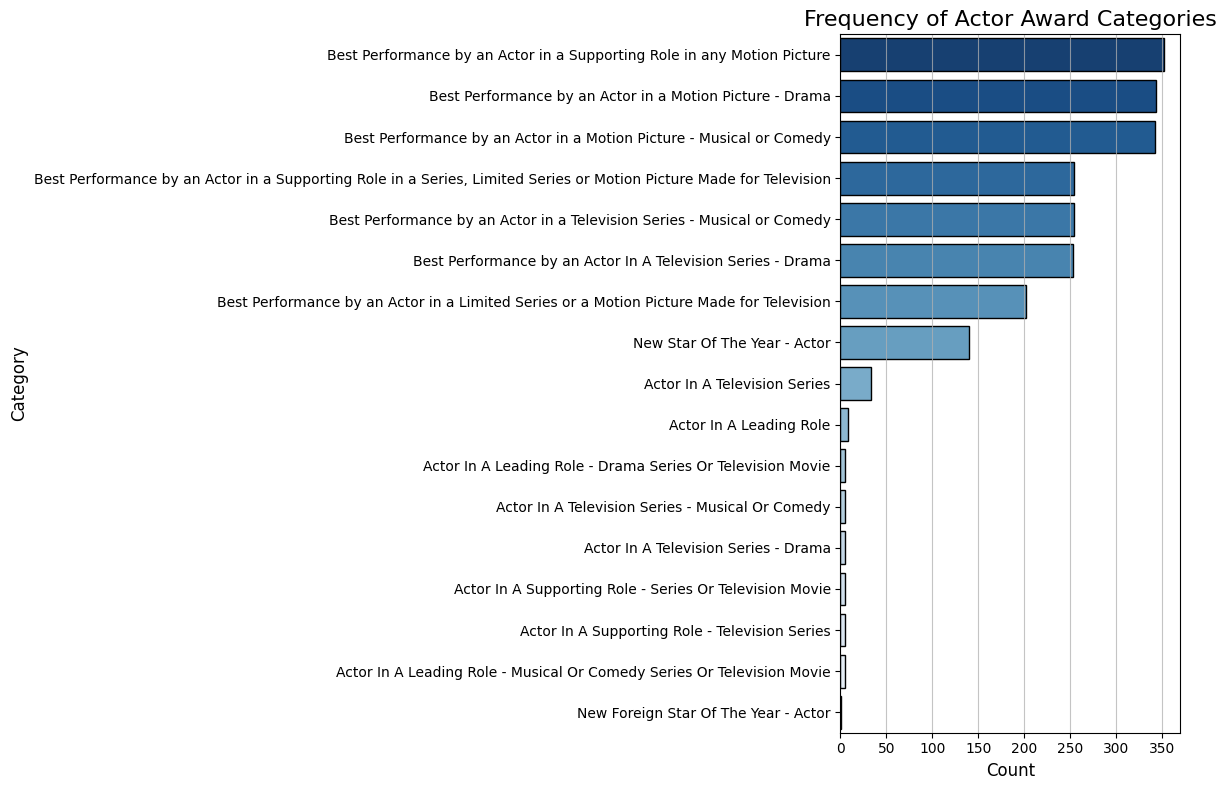

<ipython-input-79-ce62c64e2a4a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




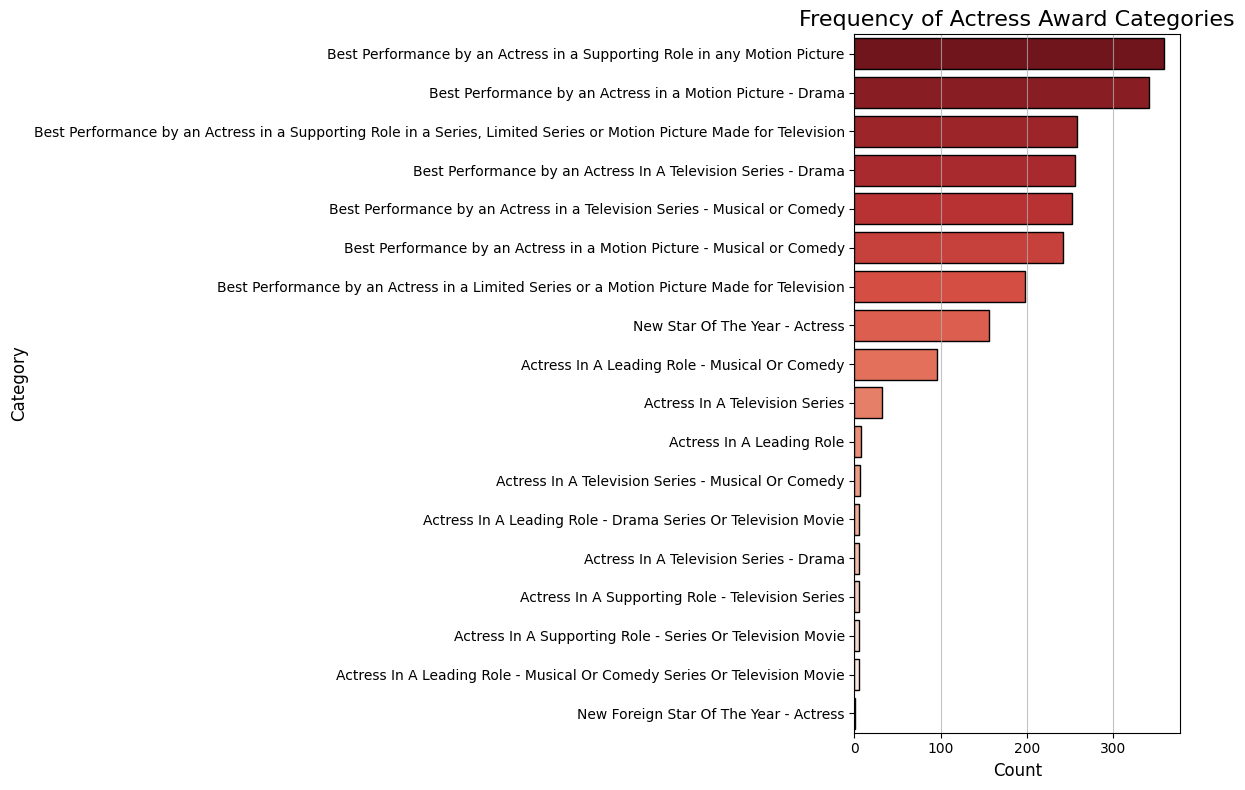

In [ ]:
## Count plot for Actor Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actor_awards, y='category', order=actor_awards['category'].value_counts().index, palette='Blues_r', edgecolor='black')
plt.title('Frequency of Actor Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

## Count plot for Actress Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actress_awards, y='category', order=actress_awards['category'].value_counts().index, palette='Reds_r', edgecolor='black')
plt.title('Frequency of Actress Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')


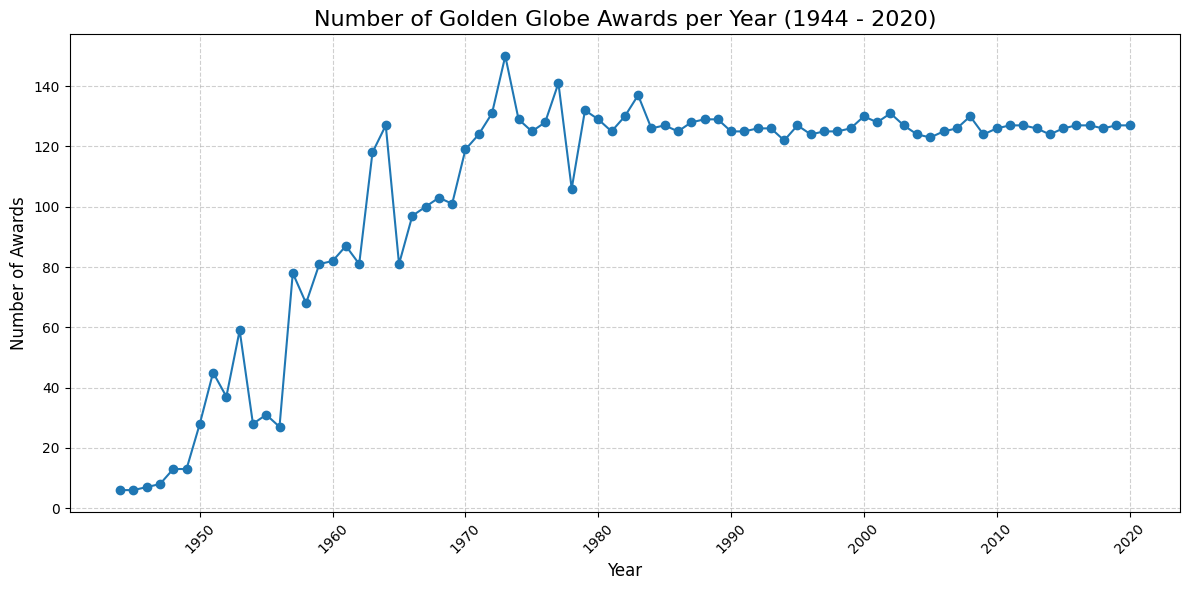

In [ ]:
print(award_df.columns)
# awards_per_year = award_df['year'].value_counts().sort_index() # Original line
awards_per_year = award_df['year_award'].value_counts().sort_index()

## Create a line plot of awards per year
plt.figure(figsize=(12, 6))
awards_per_year.plot(kind='line', marker='o') # Use the plot method of the pandas Series
plt.title('Number of Golden Globe Awards per Year (1944 - 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

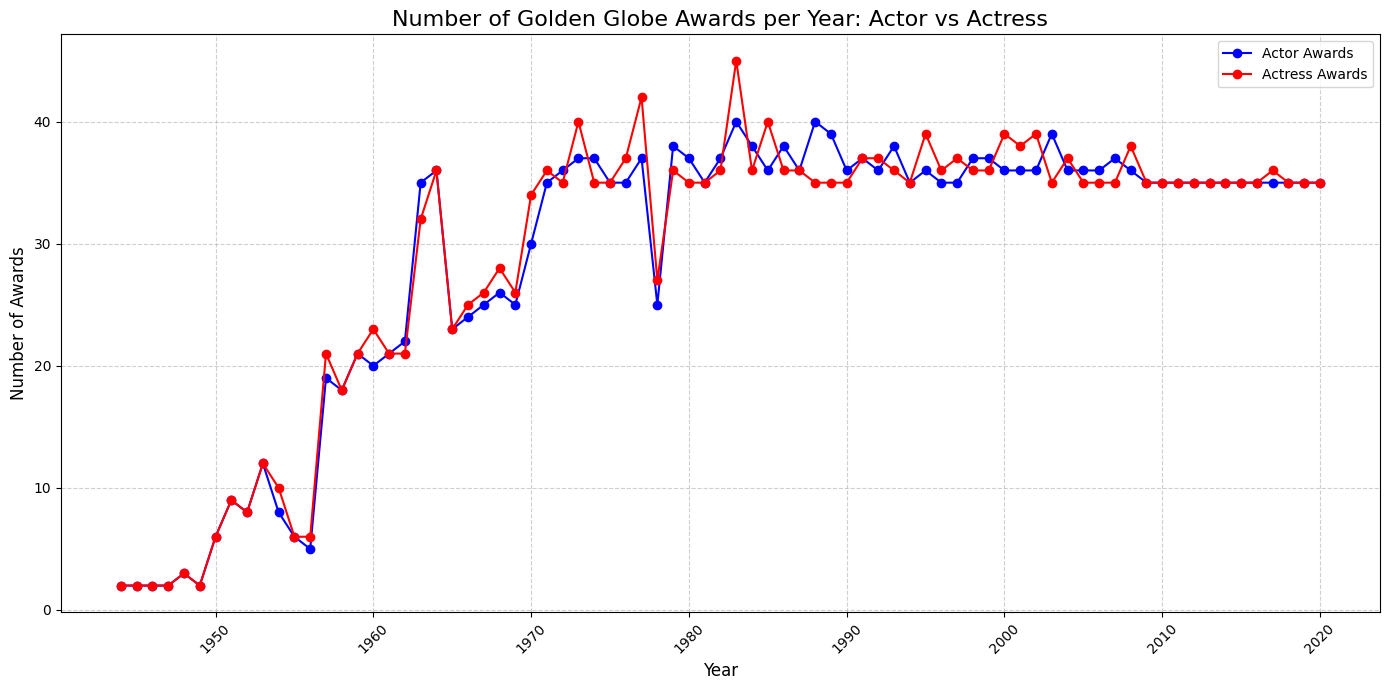

In [ ]:
# Ensure 'year_award' is treated as a numeric column if it's not already
actor_awards['year_award'] = pd.to_numeric(actor_awards['year_award'], errors='coerce')
actress_awards['year_award'] = pd.to_numeric(actress_awards['year_award'], errors='coerce')

# Drop any rows where conversion to numeric failed (if errors='coerce')
actor_awards = actor_awards.dropna(subset=['year_award'])
actress_awards = actress_awards.dropna(subset=['year_award'])

# Count awards per year for actors and actresses
actor_awards_per_year = actor_awards['year_award'].value_counts().sort_index()
actress_awards_per_year = actress_awards['year_award'].value_counts().sort_index()

# Create a line plot comparing awards per year for actors and actresses
plt.figure(figsize=(14, 7))
plt.plot(actor_awards_per_year.index, actor_awards_per_year.values, marker='o', linestyle='-', label='Actor Awards', color='blue')
plt.plot(actress_awards_per_year.index, actress_awards_per_year.values, marker='o', linestyle='-', label='Actress Awards', color='red')

plt.title('Number of Golden Globe Awards per Year: Actor vs Actress', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend() # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()

Tv series

In [61]:
# Filter the DataFrame for TV series
# We'll look for keywords in the 'category' column
tv_series_keywords = ['Television', 'Series', 'TV']
tv_awards_df = award_df[
    award_df['category'].str.contains('|'.join(tv_series_keywords), case=False, na=False)
]

# Display the first few rows of the filtered DataFrame
print("TV Series Awards Data:")
print(tv_awards_df.head())

# Print the number of TV series award entries found
print(f"\nTotal TV series award entries: {tv_awards_df.shape[0]}")

TV Series Awards Data:
     year_film  year_award  ceremony                category  \
296       1955        1956        13  Television Achievement   
297       1955        1956        13  Television Achievement   
354       1956        1957        14  Television Achievement   
355       1956        1957        14  Television Achievement   
356       1956        1957        14  Television Achievement   

                    nominee  \
296              Desi Arnaz   
297             Dinah Shore   
354                Cheyenne   
355         Matinee Theatre   
356  Mickey Mouse Club, The   

                                                  film   win  \
296                               American Comedy, The  True   
297  Walt Disney's Wonderful World of Color (Davy C...  True   
354                                                N/s  True   
355                                                N/s  True   
356                                                N/s  True   

     is_repeat_nomin

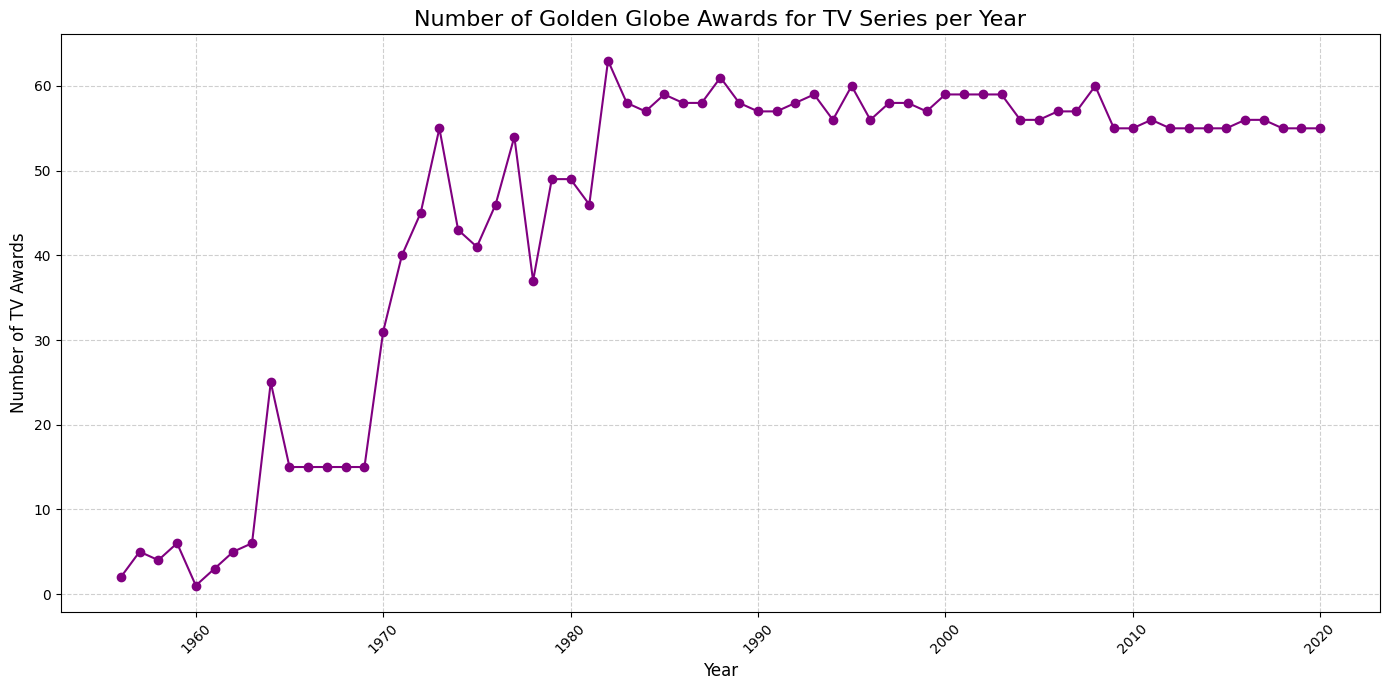

In [62]:
# Count TV awards per year
tv_awards_per_year = tv_awards_df['year_award'].value_counts().sort_index()

# Create a line plot for TV series awards per year
plt.figure(figsize=(14, 7))
plt.plot(tv_awards_per_year.index, tv_awards_per_year.values, marker='o', linestyle='-', color='purple')

plt.title('Number of Golden Globe Awards for TV Series per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of TV Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## References  
1.Unanimad. (n.d.). *Golden Globe Awards* [Dataset]. Kaggle. [https://www.kaggle.com/datasets/unanimad/golden-globe-awards](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)  
2.Golden Globe Awards. (2025). Golden Globe trophy [Image]. Def Pen. https://defpen.com/2025-golden-globe-awards-winners-list/